In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from pathlib import Path
from DataGenerator import DataGenerator

# training set data generator
root = "/home/ji/Dropbox/Robotics/CMSC733/Project1"
train_path = Path(root) / "Phase2" / "Data" / "Train"
train_gen = DataGenerator(train_path, mode="unsupervised_test")

# tensorflow dataset
im_crop_shape = (train_gen.crop_size,train_gen.crop_size,3)
im_ori_shape = (train_gen.resize_shape[1],train_gen.resize_shape[0],3)

output_signature=( (tf.TensorSpec(shape=im_crop_shape,dtype=tf.float32),#input
                    tf.TensorSpec(shape=im_crop_shape,dtype=tf.float32),
                    tf.TensorSpec(shape=im_ori_shape,dtype=tf.float32),
                    tf.TensorSpec(shape=(2,),dtype=tf.float32),
                    tf.TensorSpec(shape=(8,),dtype=tf.float32),
                    ),
                     
                    tf.TensorSpec(shape=im_ori_shape,dtype=tf.float32) # output
                    )
train_ds = tf.data.Dataset.from_generator(train_gen,
                                          output_signature=output_signature)

def config_ds(ds):
    AUTOTUNE = tf.data.AUTOTUNE
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    ds = ds.batch(4)
    return ds

train_ds = config_ds(train_ds)

2024-02-27 22:00:27.025395: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 22:00:27.077852: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 22:00:27.077887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 22:00:27.079458: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 22:00:27.088853: I tensorflow/core/platform/cpu_feature_guar

In [20]:
sample_input, sample_output = next(iter(train_ds))
print(sample_output.shape)


[[ 45 122]
 [172 122]
 [172 249]
 [ 45 249]]
[[ 22 144]
 [146 142]
 [191 249]
 [ 40 246]]
[[ 2.38887969e+00  9.85587621e-02 -1.76666591e+02]
 [-1.43396559e-01  1.50527801e+00  5.00536191e+01]
 [ 2.62216740e-03  5.34329453e-04  1.00000000e+00]]
[[ 74  95]
 [201  95]
 [201 222]
 [ 74 222]]
[[ 87 123]
 [183  89]
 [183 252]
 [ 42 250]]
[[-2.73580082e+01 -1.31117389e+01  3.31983610e+03]
 [-1.35240994e+01 -2.85454157e+01  3.22314598e+03]
 [-6.72840766e-02 -5.98555067e-02  1.00000000e+00]]
[[ 50  68]
 [177  68]
 [177 195]
 [ 50 195]]
[[ 67  60]
 [174  98]
 [163 168]
 [ 79 222]]
[[ 2.92775136e-01 -3.79010099e-01  5.45980140e+01]
 [-7.99312275e-02  1.28858297e-01  3.05526953e+01]
 [-1.13806079e-03 -3.64044480e-03  1.00000000e+00]]
[[ 69  94]
 [196  94]
 [196 221]
 [ 69 221]]
[[ 68  82]
 [227 120]
 [188 192]
 [ 65 244]]
[[ 8.97218715e-02 -2.83709586e-01  7.56359371e+01]
 [-1.35717630e-01  2.68645736e-02  5.60612103e+01]
 [-2.01687388e-03 -2.30805029e-03  1.00000000e+00]]
[[ 58 118]
 [185 118]
 [

In [16]:
sample_input[0].shape

TensorShape([4, 128, 128, 3])

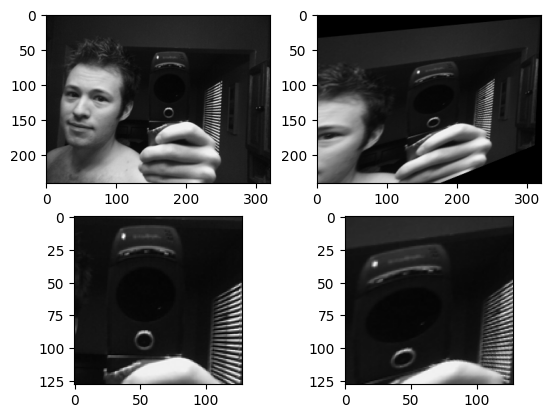

tf.Tensor(
[[ 45. 122.]
 [ 74.  95.]
 [ 50.  68.]
 [ 69.  94.]], shape=(4, 2), dtype=float32) tf.Tensor(
[[ 23. -22.  26. -20. -19.   0.   5.   3.]
 [-13. -28.  18.   6.  18. -30.  32. -28.]
 [-17.   8.   3. -30.  14.  27. -29. -27.]
 [  1.  12. -31. -26.   8.  29.   4. -23.]], shape=(4, 8), dtype=float32)


In [21]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.imshow(sample_input[2][0,:,:,:]/255.0)
plt.subplot(2,2,2)
plt.imshow(sample_output[0,:,:,:]/255.0)
plt.subplot(2,2,3)
plt.imshow(sample_input[0][0,:,:,:]/255.0)
plt.subplot(2,2,4)
plt.imshow(sample_input[1][0,:,:,:]/255.0)
plt.show()
print(sample_input[3],sample_input[4])

In [27]:
from tensor_dlt import TensorDLT
out = TensorDLT(h4pt_batch=sample_input[4],
                upper_left_corner=sample_input[3],
                batch_size=4,debug=True)

==== expected:
 [[ 2.38887969e+00  9.85587621e-02 -1.76666591e+02]
 [-1.43396559e-01  1.50527801e+00  5.00536191e+01]
 [ 2.62216740e-03  5.34329453e-04  1.00000000e+00]]
==== calculated:
 [[ 2.3889503e+00  9.8641247e-02 -1.7668163e+02]
 [-1.4341033e-01  1.5053507e+00  5.0055737e+01]
 [ 2.6221916e-03  5.3465931e-04  1.0000000e+00]]
relative diff: 8.27e-05
[122.  45.] [122.  45.]
[122. 172.] [122. 172.]
[249. 172.] [249. 172.]
[249.  45.] [249.  45.]
==== expected:
 [[-2.73580082e+01 -1.31117389e+01  3.31983610e+03]
 [-1.35240994e+01 -2.85454157e+01  3.22314598e+03]
 [-6.72840766e-02 -5.98555067e-02  1.00000000e+00]]
==== calculated:
 [[-2.7360538e+01 -1.3112762e+01  3.3201082e+03]
 [-1.3525523e+01 -2.8548117e+01  3.2234778e+03]
 [-6.7291342e-02 -5.9859317e-02  1.0000000e+00]]
relative diff: 9.27e-05
[95. 74.] [95. 74.]
[ 95. 201.] [ 95. 201.]
[222. 201.] [222. 201.]
[222.  74.] [222.  74.]
==== expected:
 [[ 2.92775136e-01 -3.79010099e-01  5.45980140e+01]
 [-7.99312275e-02  1.28858297e-